In [1]:
import h5py


Get the label for text

In [ ]:
lan = h5py.File('/Users/yupeili/Desktop/ISO/data/CMU_MOSI_Opinion_Labels.csd')

In [ ]:
lan['Opinion Segment Labels']['data'].keys()

In [ ]:
lan['Opinion Segment Labels']['data']['03bSnISJMiM'].keys()

In [ ]:
lan['Opinion Segment Labels']['data']['03bSnISJMiM']['features']

In [ ]:
for j in lan['Opinion Segment Labels']['data'].keys():
    with open('label/'+j+'.txt', 'w') as f:
        for i in lan['Opinion Segment Labels']['data'][j]['features']:
            f.write(str(i[0]))
            f.write('\n')

In [ ]:
import nltk
nltk.download("stopwords")

Preprocess the text: use glove

In [ ]:
from nltk.corpus import stopwords
words = stopwords.words('english')
print(words[:10])

In [ ]:
'A' in words

In [ ]:
for w in ['!',',','.','?','-s','-ly','</s>','s']:
    words.append(w)

In [ ]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import os

embedding_dict = {}

with open('/Users/yupeili/Desktop/ISO/data/glove.6B/glove.6B.100d.txt', 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], 'float32')
        embedding_dict[word] = vector
        
np.save('/Users/yupeili/Desktop/ISO/data/glove.6B//wordsList', np.array(list(embedding_dict.keys())))
np.save('/Users/yupeili/Desktop/ISO/data/glove.6B//wordsvector', np.array(list(embedding_dict.values()), dtype='float32'))

In [ ]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import os
wordsList = np.load('/Users/yupeili/Desktop/ISO/data/glove.6B/wordsList.npy')
wordsList = wordsList.tolist()
wordvectors = np.load('/Users/yupeili/Desktop/ISO/data/glove.6B/wordsvector.npy')

In [ ]:
from autocorrect import Speller
correct = Speller()

path = '/Users/yupeili/Desktop/ISO/data/Raw/Transcript/Segmented/'
files = os.listdir(path)
for file in files:
    with open(path + file, 'r') as f:
        with open('processed_text/' + file, 'w') as ff:
            for lines in f:
                #remove the first order and '_DELIM_'
                tmp = list(lines)
                tmp.insert(lines.index('_DELIM_') + 7, ' ')
                Tmp = ''.join(tmp)
                
                Tmp = Tmp.lower()
                for i in Tmp.split()[1:]:
                    if i not in wordsList:
                        i = correct.autocorrect_word(i) # in case the wrong spelling
                        if i not in wordsList:
                            continue #ignore wrong spelling words after auto correction (32 words in total are not corrected)
                    # can not remove stop words since the sentence is short and not, ect is one of the stopwords
                    #if i not in words:
                    ff.write(str(i) + ' ')
                ff.write('\n')

In [ ]:

vocab = set()
path = '/Users/yupeili/Desktop/ISO/data/processed_text/'
files = os.listdir(path)
for file in files:
    #print(file)
    with open(path + file, 'r') as f:
        for lines in f:
            #print(lines)
            for i in lines.split():
                #print(i)
                vocab.add(i)

In [ ]:
len(vocab)

In [ ]:

with open('vocab.txt', 'w') as f:
    with open('vector.txt', 'w') as ff:
        for i in vocab:
            
            index_i = wordsList.index(i)
            f.write(i + ' ')
            tempvec = wordvectors[index_i]
            w_vector = ' '.join(map(lambda x:str(x), tempvec))
            ff.write(w_vector + '\n')
            #print(wordvectors[index_i])
            

In [182]:
bad_word = []
for i in vocab:
    if i not in wordsList:
        bad_word.append(i)

len(bad_word)

0

TODO: 
1. Deal with bad spelling words : ignore
2. Use Facet features as video feature: done
3. Get text features:
4. Train

In [3]:
path = '/Users/yupeili/Desktop/ISO/data/label/'
path2 = '/Users/yupeili/Desktop/ISO/data/processed_text/'
count = 0 
files = os.listdir(path)
ffiles = os.listdir(path2)
trainfile = []
with open('train_word.tsv', 'w') as ff:
    for i in range(62):
        trainfile.append(files[i])
        with open(path + files[i], 'r') as f:
            with open(path2 + files[i][:-3] + 'annotprocessed', 'r') as fff:
                for lines in f:
                    
                    lines = lines.replace('\n', '')
                    llines = fff.readline()
                    #print('postive\t' + llines)
                    #break
                    ff.write(str(count) + '\t' + str(count) + '\t')
                    if(float(lines)>0):
                        ff.write('postive\t' + llines)
                    elif(float(lines)<0):
                        ff.write('negative' + '\t' + llines)
                    else:
                        ff.write('neutral' + '\t' + llines)
                    count += 1
                        

In [4]:
vocab = []
wordvec = dict()
wordvec_trained = dict()

with open('vocab.txt', 'r') as f:
    for lines in f:
        vocab = (lines.split())
with open('vector.txt', 'r') as ff:
    with open('vector_trained.txt', 'r') as fff:
        count = 0
        for lines in ff:           
            list_1 = lines.strip().split(' ')
            wordvec[vocab[count]] = [ float(x) for x in list_1 ]
            
            line = fff.readline().strip().split(' ')            
            wordvec_trained[vocab[count]] = [ float(x) for x in line ]
            count += 1

visualise the vector

In [ ]:
tsne = TSNE(n_components=2, random_state=0)

words = list(wordvec.keys())
vectors = np.array([wordvec[word] for word in words])
vectors2 = np.array([wordvec_trained[word] for word in words])

Y = tsne.fit_transform(vectors[:])
Y2 = tsne.fit_transform(vectors2[:])



In [ ]:
words.index('disempowered')

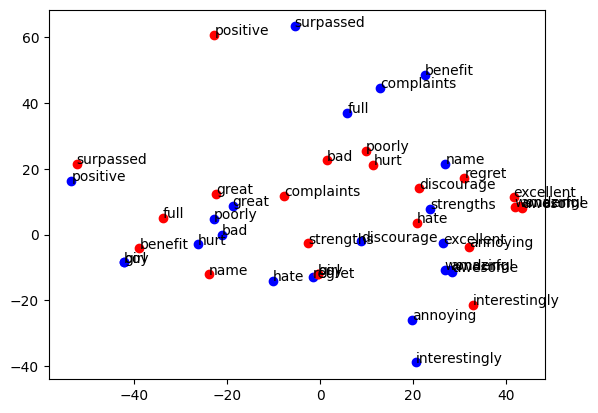

In [180]:
draw_spot=[120, 221, 307, 520, 598, 2012, 298, 948, 112 ,186, 841, 1061, 1426, 2508, 2353, 2937, 1659, 1705, 1647, 2727, 964, 2428]
for xx in draw_spot:
    plt.scatter(Y[xx, 0], Y[xx, 1], color = 'blue')
    plt.scatter(Y2[xx, 0], Y2[xx, 1], color = 'red')
    plt.annotate(vocab[xx], xy=(Y[xx, 0],Y[xx, 1]), xytext=(0,0), textcoords='offset points')
    plt.annotate(vocab[xx], xy=(Y2[xx, 0],Y2[xx, 1]), xytext=(0,0), textcoords='offset points')

plt.savefig('vector_compare.png')
plt.show()

In [5]:
trainset = []
with open('/Users/yupeili/Desktop/ISO/data/train_filename.txt', 'r') as f:
    for lines in f:
        #print(lines.strip()[1:-6])
        trainset.append([lines.strip()[1:-6]])

testset = []
with open('/Users/yupeili/Desktop/ISO/data/test_filename.txt', 'r') as f:
    for lines in f:
        #print(lines.strip()[:-4])
        testset.append([lines.strip()[:-4]])

In [6]:
import pickle
(train_text, train_label, test_text, test_label, max_utt_len, train_len, test_len) = pickle.load(open('/Users/yupeili/Desktop/ISO/data/text.pickle', 'rb'))

In [17]:
import pickle
(train_video, _, test_video, _, _, _, _) = pickle.load(open('/Users/yupeili/Desktop/ISO/data/video.pickle', 'rb'))

In [18]:
import pickle
train_video1 = pickle.load(open('/Users/yupeili/Desktop/ISO/data/video_train.pickle', 'rb'))
test_video1 = pickle.load(open('/Users/yupeili/Desktop/ISO/data/video_test.pickle', 'rb'))

In [19]:
train_video.shape

(62, 63, 100)

In [20]:
train_video1.shape

(61, 63, 35)

In [1]:
import numpy as np
label_train = np.zeros([61,63])
label_test = np.zeros([31,63])
len_train = []
len_test = []
text_train = np.zeros([61,63,100])
text_test = np.zeros([31,63,100])

In [7]:
trainset[0]

['BvYR0L6f2Ig']

In [8]:
import random
count = 0
for i in trainset:
    with open('/Users/yupeili/Desktop/ISO/data/label/' + i[0] + '.txt') as f:
        ccount = 0
        '''
        for lines in f:
            if float(lines.strip()) > 0:
                label_train[count][ccount] = 1.0
            elif float(lines.strip()) < 0:
                label_train[count][ccount] = 0.0
            else:
                if random.random() > 0.5:
                    label_train[count][ccount] = 1.0
                else:
                    label_train[count][ccount] = 0.0
            ccount += 1
        len_train.append(ccount)
        '''
        for lines in f:
            
            label_train[count][ccount] = float(lines.strip())
            
            ccount += 1
        len_train.append(ccount)
        
    count += 1

In [22]:
count = 0
for i in testset:
    with open('/Users/yupeili/Desktop/ISO/data/label/' + i[0] + '.txt') as f:
        ccount = 0
        
        
        for lines in f:
            '''
            if float(lines.strip()) > 0:
                label_test[count][ccount] = 1.0
            elif float(lines.strip()) < 0:
                label_test[count][ccount] = 0.0
            else:
                label_test[count][ccount] = -1.0
            
                
                if random.random() > 0.5:
                    label_test[count][ccount] = 1.0
                else:
                    label_test[count][ccount] = 0.0
                '''
            
            label_test[count][ccount] = float(lines.strip())
            ccount += 1
        len_test.append(ccount)
    count += 1

In [9]:
count = 0
for i in trainset:
    with open('/Users/yupeili/Desktop/ISO/data/processed_text/' + i[0] + '.annotprocessed') as f:
        ccount = 0
        for lines in f:
            wordss = lines.strip().split()
            
            #use average word embedding as the sentence embedding 
            sentence_embed = np.average([wordvec_trained[x] for x in wordss], axis = 0)
            text_train[count][ccount] = sentence_embed
            
            ccount += 1
        
    count += 1

In [10]:
count = 0
for i in testset:
    with open('/Users/yupeili/Desktop/ISO/data/processed_text/' + i[0] + '.annotprocessed') as f:
        ccount = 0
        for lines in f:
            wordss = lines.strip().split()
            
            #use average word embedding as the sentence embedding 
            sentence_embed = np.average([wordvec_trained[x] for x in wordss], axis = 0)
            text_test[count][ccount] = sentence_embed
            
            ccount += 1
        
    count += 1

In [14]:
import pickle
file = open('mytext_revise.pickle', 'wb')
pickle.dump((text_train, label_train, text_test, label_test, max_utt_len, len_train, len_test), file)
file.close()

In [23]:
import pickle
file = open('mytext_autoencoder.pickle', 'wb')
pickle.dump((text_train, label_train, text_test, label_test, max_utt_len, len_train, len_test), file)
file.close()

In [24]:
file = open('mytext_auto1.pickle', 'wb')
pickle.dump((text_train, label_train, max_utt_len, len_train, len_test), file)
file.close()

In [25]:
file = open('mytext_auto2.pickle', 'wb')
pickle.dump((text_test, label_test), file)
file.close()

In [14]:
label_test.shape

(31, 63)

In [15]:
max_utt_len

63

In [21]:
len(len_test)

31

In [26]:
(train_text, train_label, test_text, test_label, max_utt_len, train_len, test_len) = pickle.load(open('/Users/yupeili/Desktop/ISO/data/mytext_autoencoder.pickle', 'rb'))


Get the sentence sentiment score

In [87]:
from senticnet.senticnet import SenticNet
import math

sn = SenticNet()
sn.polarity_value('good')

'0.191'

In [85]:
train_score = np.zeros([61,63,1])
test_score = np.zeros([31,63,1])
count = 0
for i in trainset:
    with open('/Users/yupeili/Desktop/ISO/data/processed_text/' + i[0] + '.annotprocessed') as f:
        ccount = 0
        for lines in f:
            wordss = lines.strip().split()
            #print(wordss)
            
            res = 0
            for x in wordss:
                #print(x)
                
                try:
                    res += float(sn.polarity_value(x))
                    #res = res + tmp
                    #print(1)
                except:
                    continue   
            #score = np.sum([sn.polarity_value(x) for x in wordss], axis = 0)
            train_score[count][ccount] = res
            
            ccount += 1
    break   
    count += 1


count = 0   
for i in testset:
    with open('/Users/yupeili/Desktop/ISO/data/processed_text/' + i[0] + '.annotprocessed') as f:
        ccount = 0
        for lines in f:
            wordss = lines.strip().split()
            
            res = 0
            for x in wordss:
                try:
                    res += float(sn.polarity_value(x))
                except:
                    continue   
            #score = np.sum([sn.polarity_value(x) for x in wordss], axis = 0)
            test_score[count][ccount] = res
            
            ccount += 1
        
    count += 1

In [88]:
file = open('mytext_auto1.pickle', 'wb')
pickle.dump((text_train, label_train, max_utt_len, len_train, len_test), file)
file.close()

In [89]:
file = open('mytext_auto2.pickle', 'wb')
pickle.dump((text_test, label_test, train_score, test_score), file)
file.close()

In [90]:
(text_test, label_test, train_score, test_score) = pickle.load(open('/Users/yupeili/Desktop/ISO/data/mytext_auto2.pickle', 'rb'))


In [92]:
train_score.shape

(61, 63, 1)